ALLL FLOORS

floor_num:  15 

[0.00066715 0.00065146 0.00063708 0.00062482 0.00061275 0.00060089
 0.00058872 0.00057806 0.00056781 0.00055222 0.00054267 0.00053161
 0.00051904 0.00050657]
slopeOne:  6429641.721243985 with error: 7116.284686026751
sizeOne:  14
[0.00067077 0.00065619 0.00063879 0.00062643 0.00061516 0.00060471
 0.00059093 0.00058088 0.0005666  0.00055755 0.00054347 0.00053231
 0.00052045 0.00050607]
slopeTwo:  6309155.387162295 with error: 6852.076800393631
sizeTwo:  14
[0.00066956 0.00065368 0.00063719 0.00062522 0.00061537 0.0006032
 0.00059103 0.00057867 0.00056771 0.00055564 0.00054217]
slopeThree:  6287691.265817923 with error: 9787.156866673784
sizeThree:  11

Average Radius: 6342162.791408067
Average Radius error:  4635.38208594084


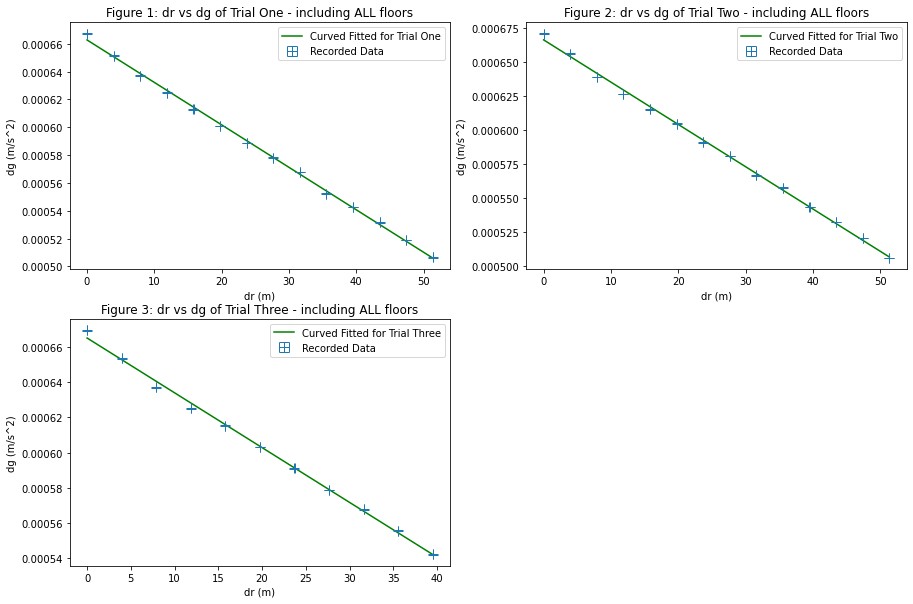

In [7]:
# Radius of the Earth

######### WITH ALLL FLOORS, no corrections for floors nor the sun

print("ALLL FLOORS\n")

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

# radius of the earth 6371,000 m, 6368,000m for toronto
def func(x, m, b):
    return m*x + b


def rec_u(a, u):
    return u / a**2

floor_num, trialOne, trialTwo, trialThree = np.loadtxt(
    'data - data.csv', 
    dtype=float, skiprows=1, delimiter=',', unpack=True)

print('floor_num: ', len(floor_num), '\n')

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))
k = 0.10055
g = 9.804253
m = 2 # number of parameters in the model
plt.figure(figsize=(15,10))

######################################################################
# Uncertainties
dr_msm_err = 0.01    # xerr, 0.01 measurement uncertainty
dg_msm_err =  0.2 * k / 100000     # yerr, 0.2 measurement uncertainty
# print("yerr", -(2*g*3.95)/(dg_msm_err))

######################################################################
# Trial 1

for count in range(len(floor_num) - 1):
    floor = count
    # reading = trialOne[count] - trialOne[0]
    reading = trialOne[count]
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count]
    dr[count] = floor * 3.95

dg = dg[:-1]
dr = dr[:-1]

print(dg)

u = np.ones(len(floor_num) -1)
u = u * dg_msm_err

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=u, absolute_sigma=True)
pstd1 = np.sqrt(np.diag(pcov))

plt.subplot(2,2,1)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", label='Curved Fitted for Trial One')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 1: dr vs dg of Trial One - including ALL floors")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=dg_msm_err, linestyle='None', label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeOne = (-2*g)/popt[0]
error1 = (2*g)*rec_u(popt[0], pstd1[0])

print('slopeOne: ',slopeOne, 'with error:', error1)
print('sizeOne: ', len(dg))


# ######################################################################
# # Trial 2


for count in range(len(floor_num) - 1):
    floor = count
    # reading = trialTwo[count] - trialTwo[0]
    reading = trialTwo[count]
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] 
    dr[count] = floor * 3.95


print(dg)


popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,2)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", label='Curved Fitted for Trial Two')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 2: dr vs dg of Trial Two - including ALL floors")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=dg_msm_err, linestyle='None', label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeTwo = (-2*g)/popt[0]
error2 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeTwo: ',slopeTwo, 'with error:', error2)
print('sizeTwo: ', len(dg))


# ######################################################################
# # Trial 3

dg = np.zeros(len(floor_num))
dr = np.zeros(len(floor_num))

for count in range(len(floor_num) - 1):
    floor = count
    # reading = trialThree[count] - trialThree[0]
    reading = trialThree[count]
    dg[count] = reading * k / 100000    # m/s^2 (mgal to m/s^2: 100000)
    dg[count] = dg[count] 
    dr[count] = floor * 3.95

dg = dg[:-4]
dr = dr[:-4]

print(dg)

u = u[:11]

popt, pcov = curve_fit(func, dr, dg, p0=[0, 0], sigma=u, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

plt.subplot(2,2,3)
plt.plot(dr, func(dr, popt[0], popt[1]), "g-", label='Curved Fitted for Trial Three')
plt.xlabel("dr (m)")
plt.ylabel("dg (m/s^2)")
plt.title("Figure 3: dr vs dg of Trial Three - including ALL floors")
plt.errorbar(dr, dg, xerr=dr_msm_err, yerr=dg_msm_err, linestyle='None', label="Recorded Data", elinewidth=1, capsize=5)
plt.legend()

slopeThree = (-2*g)/popt[0]
error3 = (2*g)*rec_u(popt[0], pstd[0])

print('slopeThree: ', slopeThree, 'with error:', error3)
print('sizeThree: ', len(dg))


# ######################################################################
print('\nAverage Radius:',(slopeOne+slopeTwo+slopeThree)/3)

error_avg = math.sqrt(error1**2 + error2**2 + error3**2)/3
print('Average Radius error: ', error_avg)

plt.savefig("ROE_ALL_floors.png", dpi=200, transparent=False) #PNG format

# radius of the earth 6371,000 m, 6368,000m for toronto